<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment11_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
# from google.colab import files

# uploaded = files.upload()

import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['movie_review.zip']), "r")
zf.extractall()

review_data = load_files(r"movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
print(vectorizer)
X = vectorizer.fit_transform(documents).toarray()
print(X)

# tfidfconverter = TfidfTransformer()
# print(tfidfconverter)
# X = tfidfconverter.fit_transform(X).toarray()
# print(X)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3, shuffle=False)

print(train_data[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.7, max_features=1000, min_df=5,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\

In [0]:
max([max(sequence) for sequence in train_data])

36

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=1000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
x_train[10]

array([1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
train_labels[10]

1

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
y_train[10]

1.0

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_29 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [121]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10000,
                    batch_size=512,
                    validation_data=(x_val, y_val))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
401/401 [==============================] - 0s 40us/step - loss: 0.5400 - binary_accuracy: 0.6708 - val_loss: 0.9520 - val_binary_accuracy: 0.5470
Epoch 7502/10000
401/401 [==============================] - 0s 43us/step - loss: 0.5400 - binary_accuracy: 0.6708 - val_loss: 0.9527 - val_binary_accuracy: 0.5460
Epoch 7503/10000
401/401 [==============================] - 0s 38us/step - loss: 0.5400 - binary_accuracy: 0.6708 - val_loss: 0.9523 - val_binary_accuracy: 0.5470
Epoch 7504/10000
401/401 [==============================] - 0s 45us/step - loss: 0.5400 - binary_accuracy: 0.6708 - val_loss: 0.9527 - val_binary_accuracy: 0.5460
Epoch 7505/10000
401/401 [==============================] - 0s 38us/step - loss: 0.5400 - binary_accuracy: 0.6708 - val_loss: 0.9525 - val_binary_accuracy: 0.5470
Epoch 7506/10000
401/401 [==============================] - 0s 46us/step - loss: 0.5400 - binary_accuracy: 0.6708 - val_loss: 0.9529 - val_binary_accuracy: 0.5460
Epo

In [122]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

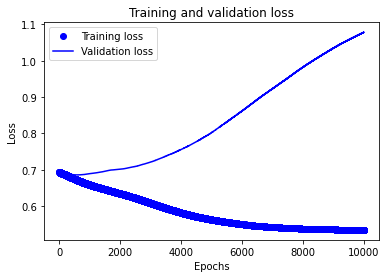

In [123]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

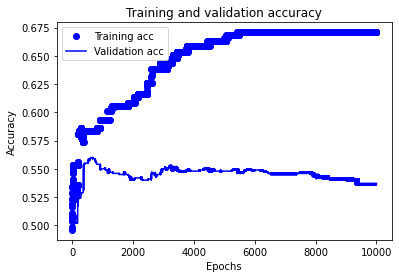

In [124]:
plt.clf()   # clear figure
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [125]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, 
          epochs=4, 
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 1401 samples, validate on 1000 samples
Epoch 1/4
1401/1401 [==============================] - 0s 77us/step - loss: 0.6925 - accuracy: 0.5089 - val_loss: 0.6917 - val_accuracy: 0.5220
Epoch 2/4
1401/1401 [==============================] - 0s 18us/step - loss: 0.6916 - accuracy: 0.5360 - val_loss: 0.6909 - val_accuracy: 0.5230
Epoch 3/4
1401/1401 [==============================] - 0s 20us/step - loss: 0.6905 - accuracy: 0.5282 - val_loss: 0.6902 - val_accuracy: 0.5380
Epoch 4/4
1401/1401 [==============================] - 0s 21us/step - loss: 0.6898 - accuracy: 0.5418 - val_loss: 0.6897 - val_accuracy: 0.5340


In [126]:
# 3 datasets: _test, _val, _train
# this last evaluation is on realy never seen data
results = model.evaluate(x_test, y_test)
results
# first is loss and second is metric as defined above

601/601 [==============================] - 0s 32us/step


[0.6907920650951874, 0.5374376177787781]

In [127]:
predicted = model.predict(x_test)
predicted

array([[0.5 ],
       [0.55],
       [0.49],
       [0.5 ],
       [0.49],
       [0.49],
       [0.51],
       [0.5 ],
       [0.51],
       [0.52],
       [0.49],
       [0.51],
       [0.51],
       [0.51],
       [0.49],
       [0.51],
       [0.51],
       [0.5 ],
       [0.55],
       [0.52],
       [0.51],
       [0.51],
       [0.49],
       [0.5 ],
       [0.5 ],
       [0.51],
       [0.51],
       [0.51],
       [0.56],
       [0.51],
       [0.51],
       [0.49],
       [0.51],
       [0.51],
       [0.49],
       [0.56],
       [0.51],
       [0.52],
       [0.53],
       [0.51],
       [0.5 ],
       [0.5 ],
       [0.51],
       [0.5 ],
       [0.5 ],
       [0.49],
       [0.49],
       [0.51],
       [0.51],
       [0.51],
       [0.5 ],
       [0.49],
       [0.51],
       [0.5 ],
       [0.51],
       [0.52],
       [0.58],
       [0.52],
       [0.52],
       [0.52],
       [0.49],
       [0.52],
       [0.51],
       [0.51],
       [0.5 ],
       [0.55],
       [0.

In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predicted_classes = [0 if float(i) < 0.5 else 1 for i in predicted]

target_names=["neg. review", "pos. review"]
print(classification_report(y_test, predicted_classes, target_names=target_names))

cnf_matrix=confusion_matrix(y_test, predicted_classes)
cnf_matrix

              precision    recall  f1-score   support

 neg. review       0.56      0.39      0.46       302
 pos. review       0.53      0.69      0.60       299

    accuracy                           0.54       601
   macro avg       0.54      0.54      0.53       601
weighted avg       0.54      0.54      0.53       601



array([[118, 184],
       [ 94, 205]])

Confusion matrix, without normalization
[[118 184]
 [ 94 205]]


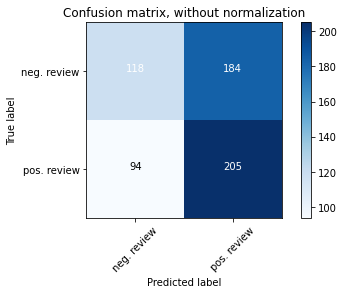

Normalized confusion matrix
[[0.39 0.61]
 [0.31 0.69]]


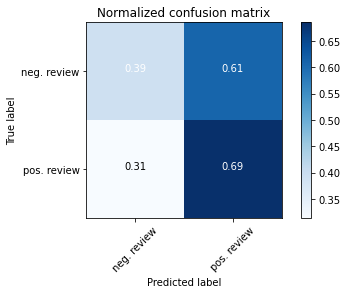

In [129]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix=confusion_matrix(y_test, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()